# Propuesta de visualizaciones:

1. [Evolución de duración media de viaje (2018–2025)][1]
2. Distribución de motivos de viaje
3. Mapa de calor: motivos de viaje por comunidad (rural vs ciudad)
4. Comparativa gasto medio turista "nuevo modelo de viaje" vs general (por ejemplo, nómadas digitales vs familias)
5. Línea temporal: turismo experiencial vs tradicional

[1] Ver si hay datos disponibles e 2025 o tan solo hasta 2024.

In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
df_AOD = pd.read_excel("../data/ACTIVIDADES_OCIO_DL.xlsx")


In [8]:
#Esta tabla tiene muchas lineas, y vamos a limpiar esta tabla.  

def limpieza(df_AOD):
#La idea es : encontrar si hay lineas duplicadas y eliminarlas
    nb_antes = len(df_AOD)
    df_AOD = df_AOD.drop_duplicates()
    nb_despues = len(df_AOD)
    nb_borrado = nb_antes - nb_despues

    if nb_borrado > 0:
        print(f"{nb_borrado} lineas duplicadas borradas")
    else:
        print("No habia duplicado")

# Tambien vamos a eliminar el "total nacional" ya que nos bloquea para hacer las sumas.
    df_AOD = df_AOD[~df_AOD["CCAA"].str.upper().eq("TOTAL NACIONAL")]
        
#Las columnas de años, mes, producto, provincia, visita pagina, gasto toal, y transacciones no nos interesan para responder a nuestra pregunta.`
        
    columnas_a_borrar = ["MES", "PRODUCTO", "PROVINCIA", "VISITAS_PAGINAS", "GASTO_TOTAL", "TRANSACCIONES", "CCAA"]
    columnas =[col for col in columnas_a_borrar if col in df_AOD.columns]
    df_AOD = df_AOD.drop(columns=columnas)
    


#ESTRUCTURACION
#Añado una columna para tener los beneficios para cada categoria. 
      
    if "ENTRADAS" in df_AOD.columns and "PRECIO_MEDIO_ENTRADA" in df_AOD.columns:
        df_AOD["BENEFICIOS"] = df_AOD["ENTRADAS"] * df_AOD["PRECIO_MEDIO_ENTRADA"]
        print("Columna beneficios añadida")

    if "CATEGORIA" in df_AOD.columns and "BENEFICIOS" in df_AOD.columns:
        df_groupado = df_AOD.groupby(["AÑO","CATEGORIA"]).agg({
            "ENTRADAS": "sum",
            "PRECIO_MEDIO_ENTRADA": "mean",
            "BENEFICIOS": "sum"
        }).reset_index()
# Clasifico del mas grande beneficios al mas pequeño. 
    df_groupado = df_groupado.sort_values("BENEFICIOS", ascending=False)

    return df_groupado




In [9]:
df_AOD = limpieza(df_AOD)

13 lineas duplicadas borradas
Columna beneficios añadida


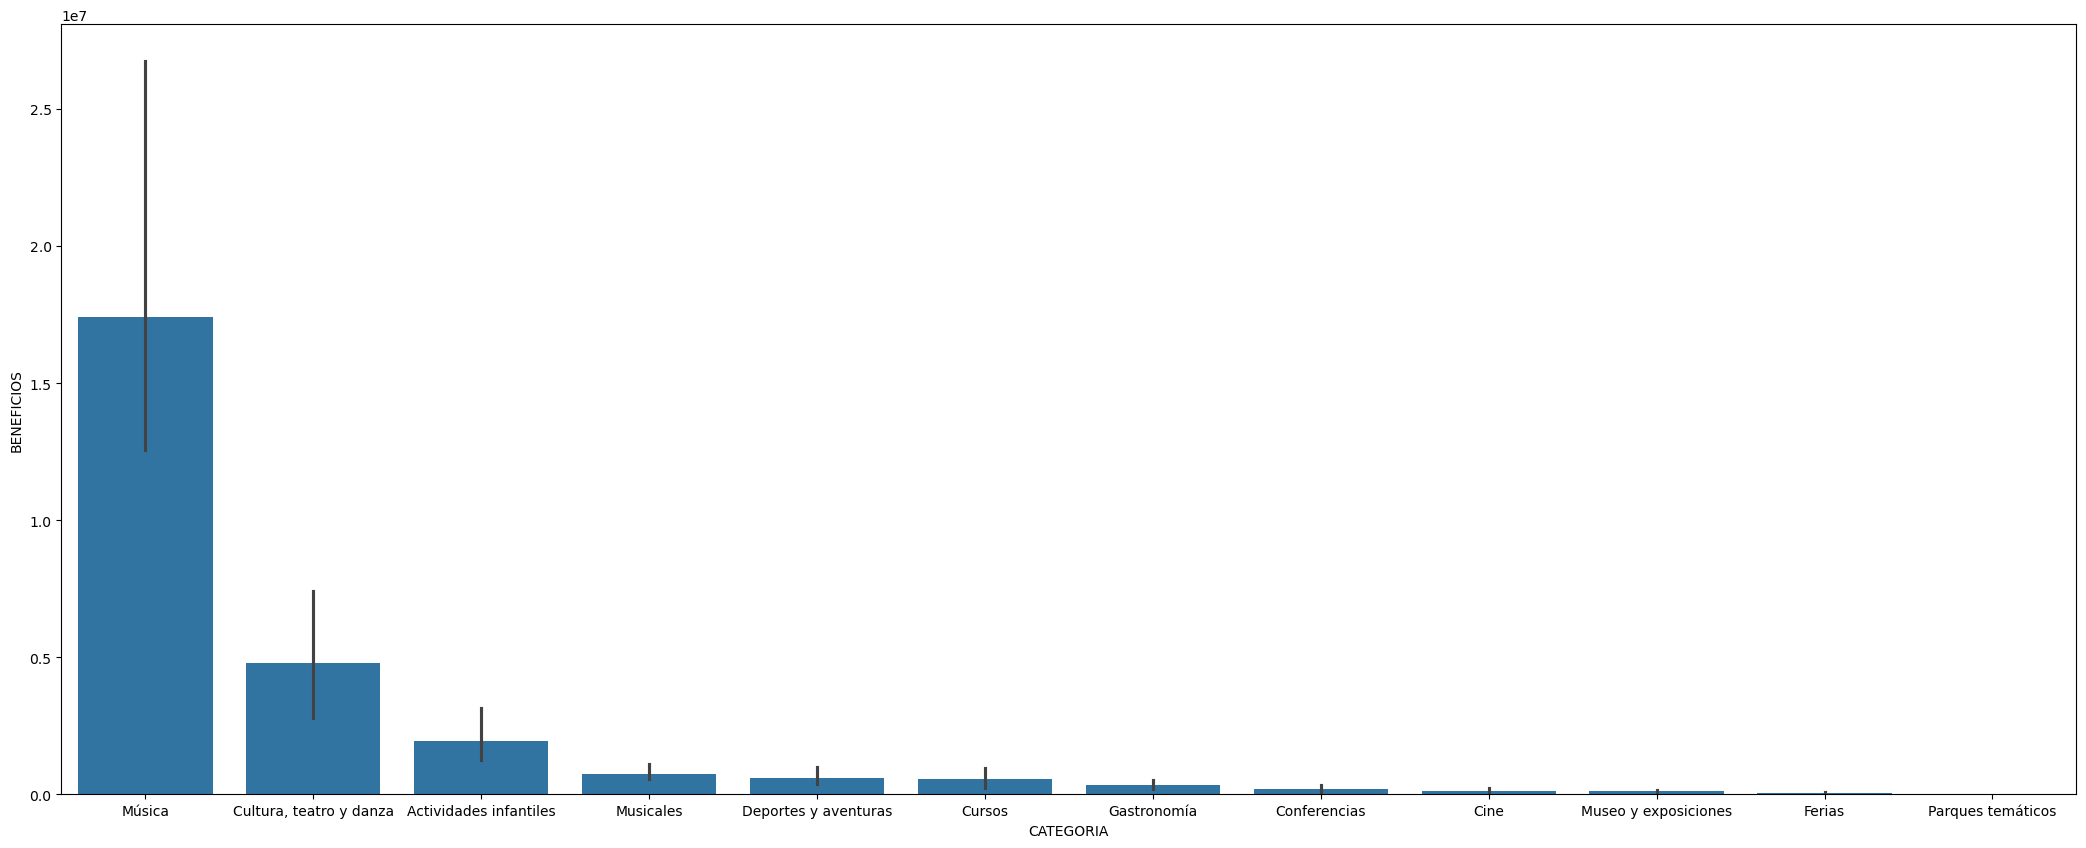

In [10]:
plt.figure(figsize = (26, 10))
sns.barplot(x = df_AOD["CATEGORIA"], y = df_AOD["BENEFICIOS"], data = df_AOD)
plt.show()

Se nota que de las tres primeras categorias de actividades de ocio, se destacan : la musica, la danza, el teatro y la cultura y en tercero, las actividades infantiles. 

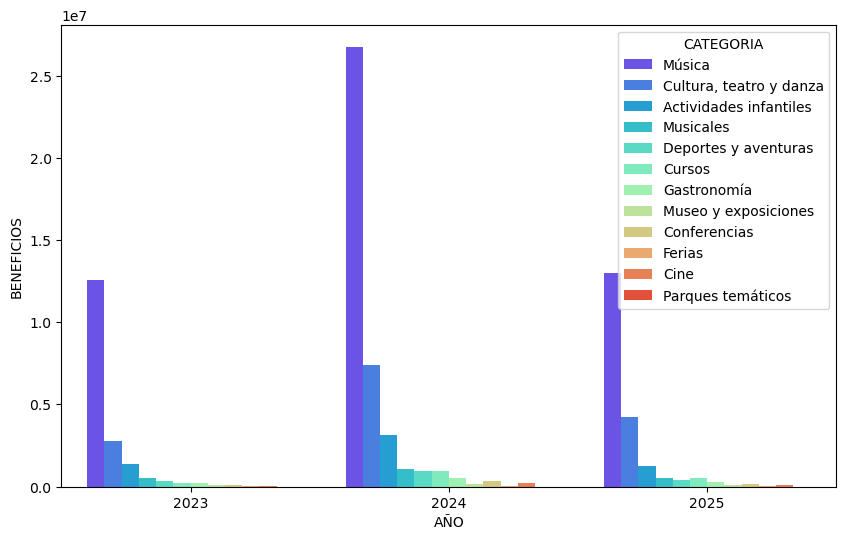

In [14]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.barplot(x = "AÑO", y = "BENEFICIOS", hue = "CATEGORIA", data = df_AOD, palette = "rainbow")

plt.show()

Los datos solo empiezan mitad de 2023 hasta mitad de 2025 lo que impide una comparacion de la evolucion de las ventas a traves de los años. 

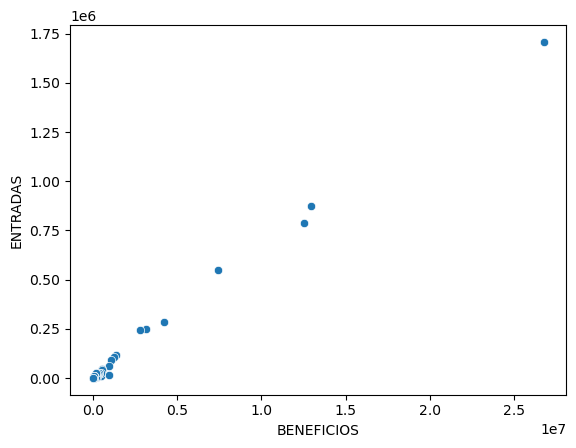

In [40]:
sns.scatterplot(x = df_AOD["BENEFICIOS"], y = df_AOD["ENTRADAS"])
plt.show()

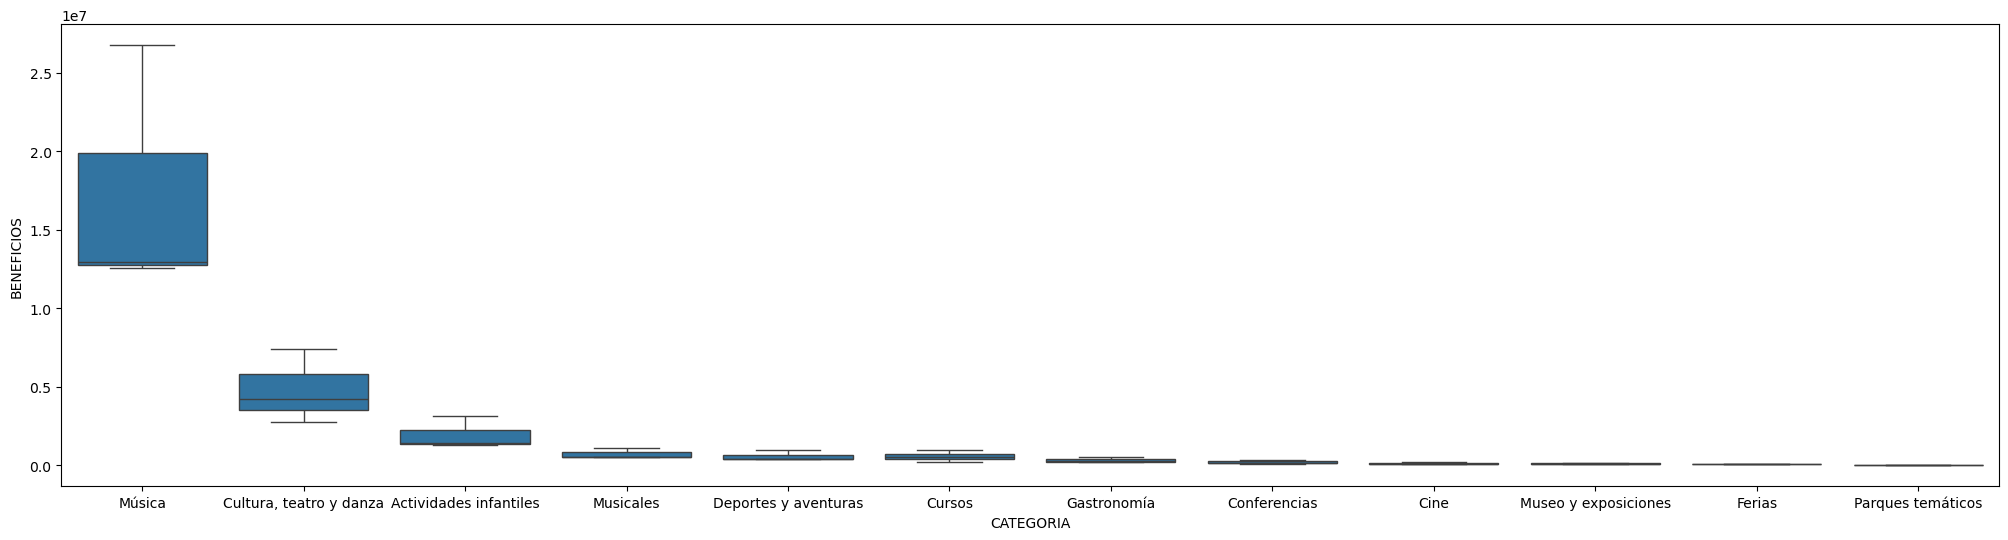

In [30]:
fig, ax = plt.subplots(figsize = (25, 6))
sns.boxplot(x = df_AOD["CATEGORIA"],
            y = df_AOD["BENEFICIOS"])

plt.show()

Aqui se destacan las tres primeras actividades de ocio en Espana. La musica llega primera tanto en terminos de beneficios que en terminos de 

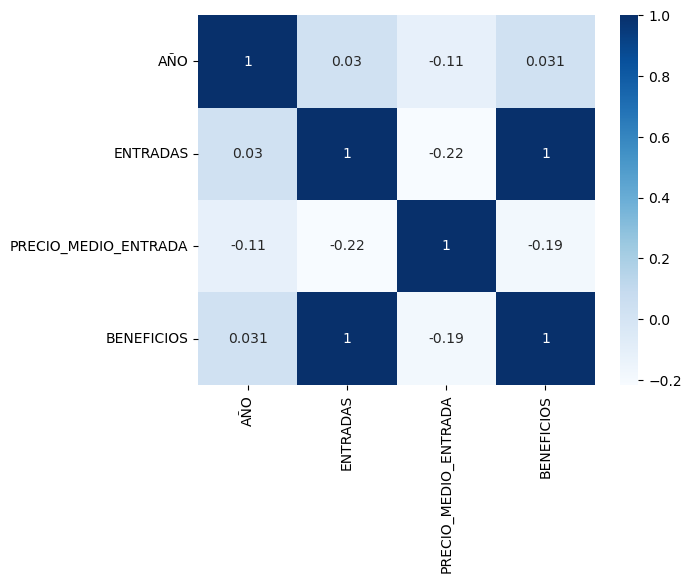

In [31]:
sns.heatmap(data = df_AOD._get_numeric_data().corr(),
            annot = True,
            cmap = "Blues")
plt.show()

Aqui podemos ver que hay una corelacion entre las entradas y lmos beneficios : efectivamente cuantas mas entras estan vendidas mas beneficios habra. 
Sin embargo, algo interesante que se destaca aqui es que si el precio medio de las entradas aumenta, entonces hay una diminucion del numero de entradas que se repercuta en los beneficios tambien. 
